<a href="https://colab.research.google.com/github/soto-xs/La-esencia-del-cliente-1/blob/main/La_esencia_del_cliente_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. CONFIGURANDO EL AMBIENTE

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
print (f'Matplotlib --> {matplotlib.__version__}')
print (f'Pandas --> {pd.__version__}')
print (f'Numpy --> {np.__version__}')
print (f'Seaborn --> {sns.__version__}')
print (f'Sklearn --> {sklearn.__version__}')

Matplotlib --> 3.10.0
Pandas --> 2.2.2
Numpy --> 1.26.4
Seaborn --> 0.13.2
Sklearn --> 1.6.1


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!pip install Pandas Numpy Matplotlib Seaborn scikit-Learn

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [57]:
import pandas as pd


from google.colab import drive
drive.mount ('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
from google.colab import drive

# Montar Google Drive correctamente
drive.mount('/content/drive')

# Cargar los datos asegurando la ruta correcta
ruta_csv = '/content/drive/MyDrive/Datasets/media prediction and its cost.csv'

# Intentar leer el archivo con diferentes separadores si es necesario
try:
    datos = pd.read_csv(ruta_csv, sep=';')  # Cambia a sep=',' si el CSV usa comas
    print("Carga exitosa:")
    print(datos.head())
except pd.errors.ParserError as e:
    print(f"Error al cargar el archivo CSV: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carga exitosa:
  food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx),brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0  Breakfast Foods,Frozen Foods,Food,7.36,2.7232,...                                                                                                                                                                                                                                                               

In [62]:
# prompt: La ruta del archivo es /content/drive/MyDrive/Datasets/media prediction and its cost.csv este archivo esta en ingles, lo ocupo que se traduzca a español

import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV
ruta_csv = '/content/drive/MyDrive/Datasets/media prediction and its cost.csv'

try:
    # Leer el archivo CSV, intentando detectar automáticamente el separador
    datos = pd.read_csv(ruta_csv)

    # Traducir nombres de columnas (si es necesario)
    # Crea un diccionario para mapear nombres de columnas en inglés a español
    column_translations = {
        'Column_Name_English_1': 'Nombre_Columna_Español_1',
        'Column_Name_English_2': 'Nombre_Columna_Español_2',
        # Agrega más traducciones según las columnas de tu archivo CSV
    }

    # Renombra las columnas utilizando el diccionario
    datos = datos.rename(columns=column_translations)

    # Guardar el DataFrame traducido en un nuevo archivo CSV
    datos.to_csv('/content/drive/MyDrive/Datasets/media_prediction_and_its_cost_es.csv', index=False, encoding='utf-8')
    print("Archivo traducido y guardado exitosamente.")
    print(datos.head())

except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {ruta_csv}")
except pd.errors.ParserError as e:
    print(f"Error al analizar el archivo CSV: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo traducido y guardado exitosamente.
     food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                      4.0           Bag Stuffers   
1                   2.5944                      3.0  Cash Register Lottery   
2                   1.3616                      2.0    High Roller Savings   
3                   1.1776                      2.0  Cash R

In [67]:
!pip install matplotlib seaborn



In [14]:
# prompt: Estudio de variables
# reemplaza los valores segun los diccionarios
# categoria_alimento = {
#     'Vegetables': 'Vegetales',
#     'Snack Foods': 'Alimentos para picar',
#     'Dairy': 'Productos lácteos',
#     'Meat': 'Carne',
#     'Fruit': 'Fruta',
#     'Jams and Jellies': 'Mermeladas y jaleas',
#     'Baking Goods': 'Productos para hornear',
#     'Breakfast Foods': 'Alimentos para el desayuno',
#     'Bread': 'Pan',
#     'Canned Soup': 'Sopa enlatada',
#     'Beer and Wine': 'Cerveza y vino',
#     'Paper Products': 'Productos de papel',
#     'Bathroom Products': 'Productos de baño',
#     'Electrical': 'Eléctrico',
#     'Candy': 'Dulces',
#     'Frozen Desserts': 'Postres congelados',
#     'Specialty': 'Especialidades',
#     'Starchy Foods': 'Alimentos ricos en almidón',
#     'Magazines': 'Revistas',
#     'Kitchen Products': 'Productos de cocina',
#     'Eggs': 'Huevos',
#     'Hot Beverages': 'Bebidas calientes',
#     'Hygiene': 'Higiene',
#     'Pain Relievers': 'Analgésicos',
#     'Pizza': 'Pizza',
#     'Carbonated Beverages': 'Bebidas carbonatadas',
#     'Pure Juice Beverages': 'Bebidas de jugo puro',
#     'Cleaning Supplies': 'Suministros de limpieza',
#     'Side Dishes': 'Acompañamientos',
#     'Frozen Entrees': 'Platos preparados congelados',
#     'Drinks': 'Bebidas',
#     'Plastic Products': 'Productos de plástico',
#     'Hardware': 'Artículos de ferretería',
#     'Cold Remedies': 'Remedios para el resfriado',
#     'Decongestants': 'Descongestionantes',
#     'Canned Tuna': 'Atún enlatado',
#     'Seafood': 'Mariscos',
#     'Canned Anchovies': 'Anchoas enlatadas',
#     'Canned Clams': 'Almejas enlatadas',
#     'Candles': 'Velas',
#     'Miscellaneous': 'Misceláneos',
#     'Canned Oysters': 'Ostras enlatadas',
#     'Canned Shrimp': 'Camarones enlatados',
#     'Packaged Vegetables': 'Vegetales envasados',
#     'Canned Sardines': 'Sardinas enlatadas'
# }
# departamento = {
#     'Produce': 'Productos frescos',
#     'Snack Foods': 'Alimentos para picar',
#     'Household': 'Artí

categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}
departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Dairy': 'Productos lácteos'
}

# Convertir una columna 'category' en un DataFrame
import pandas as pd

#  DataFrame llamado 'df' con una columna 'category'
# Crea un ejemplo de DataFrame
data = {'category': ['Vegetables', 'Snack Foods', 'Dairy'], 'other_column': [1, 2, 3]}
df = pd.DataFrame(data)

# Reemplazar valores de la columna 'category' usando el diccionario categoria_alimento
df['category'] = df['category'].replace(categoria_alimento)

# Mostrar el DataFrame resultante
print(df)


# Ejemplo de uso para traducir una columna 'department' en un DataFrame
#  DataFrame llamado 'df' con una columna 'department'
# Crea un ejemplo de DataFrame
data = {'department': ['Produce', 'Snack Foods', 'Household'], 'other_column': [1, 2, 3]}
df = pd.DataFrame(data)

# Sustituir valores de la columna 'department' usando el diccionario departamento
df['department'] = df['department'].replace(departamento)

# Mostrar el DataFrame resultante
df

               category  other_column
0             Vegetales             1
1  Alimentos para picar             2
2     Productos lácteos             3


,department,other_column
0,Productos frescos,1
1,Alimentos para picar,2
2,Artículos para el hogar,3


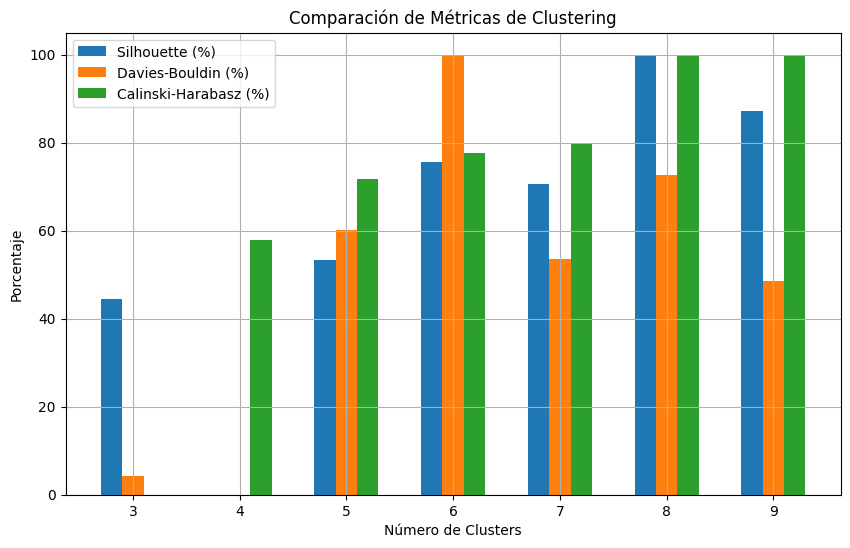

In [13]:
# prompt:  en grafico con porcentaje conforme al archivo media prediction and its cost con esta informacion: 'N_Clusters': [3, 4, 5, 6, 7, 8, 9],
#     'Silhouette': [0.489590, 0.455260, 0.496277, 0.513566, 0.509666, 0.532285, 0.522488],
#     'Davies-Bouldin': [0.900098, 0.906576, 0.813612, 0.752343, 0.823779, 0.794392, 0.831630],
#     'Calinski-Harabasz': [23281.790433, 28879.298235, 30236.606699, 30801.481159, 31025.326149, 32964.320197, 32964.584543]
# }

import pandas as pd
import matplotlib.pyplot as plt

# Crear los datos para la tabla (ya están definidos en el código anterior)
data = {
    'N_Clusters': [3, 4, 5, 6, 7, 8, 9],
    'Silhouette': [0.489590, 0.455260, 0.496277, 0.513566, 0.509666, 0.532285, 0.522488],
    'Davies-Bouldin': [0.900098, 0.906576, 0.813612, 0.752343, 0.823779, 0.794392, 0.831630],
    'Calinski-Harabasz': [23281.790433, 28879.298235, 30236.606699, 30801.481159, 31025.326149, 32964.320197, 32964.584543]
}

# Crear un DataFrame a partir de los datos
tabla_resultados = pd.DataFrame(data)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Normalizar los valores de los índices para que estén entre 0 y 1
normalized_silhouette = (tabla_resultados['Silhouette'] - tabla_resultados['Silhouette'].min()) / (tabla_resultados['Silhouette'].max() - tabla_resultados['Silhouette'].min())
normalized_davies_bouldin = (tabla_resultados['Davies-Bouldin'] - tabla_resultados['Davies-Bouldin'].min()) / (tabla_resultados['Davies-Bouldin'].max() - tabla_resultados['Davies-Bouldin'].min())
normalized_calinski_harabasz = (tabla_resultados['Calinski-Harabasz'] - tabla_resultados['Calinski-Harabasz'].min()) / (tabla_resultados['Calinski-Harabasz'].max() - tabla_resultados['Calinski-Harabasz'].min())

# Calcular los porcentajes
percentage_silhouette = normalized_silhouette * 100
percentage_davies_bouldin = (1 - normalized_davies_bouldin) * 100 # Invertir para que valores bajos sean altos porcentajes
percentage_calinski_harabasz = normalized_calinski_harabasz * 100

width = 0.2

x = tabla_resultados['N_Clusters']
plt.bar(x - width, percentage_silhouette, width, label='Silhouette (%)')
plt.bar(x, percentage_davies_bouldin, width, label='Davies-Bouldin (%)')
plt.bar(x + width, percentage_calinski_harabasz, width, label='Calinski-Harabasz (%)')

plt.xlabel('Número de Clusters')
plt.ylabel('Porcentaje')
plt.title('Comparación de Métricas de Clustering')
plt.xticks(x)
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# prompt: Muestra dataframe de coeficientes para la determinacion de clusteres

# Mostrar la tabla
tabla_resultados


,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.489590,0.900098,23281.790433
1,4,0.455260,0.906576,28879.298235
2,5,0.496277,0.813612,30236.606699
3,6,0.513566,0.752343,30801.481159
4,7,0.509666,0.823779,31025.326149
5,8,0.532285,0.794392,32964.320197
6,9,0.522488,0.831630,32964.584543


In [17]:
# prompt: dame el criterio de la dataframe de coeficientes para la determinacion con: N_Clusters, Silouette, Davies-Bouldin y Calinski_Harabasz

# El criterio para la determinación del número óptimo de clusters se basa en la
# observación de los valores de las métricas Silhouette, Davies-Bouldin y
# Calinski-Harabasz para diferentes números de clusters.

# * Silhouette: Buscamos el valor más alto. Indica qué tan similar es un punto a su propio
# cluster en comparación con otros clusters. Valores cercanos a 1 indican una buena
# separación entre clusters, mientras que valores cercanos a -1 indican que los puntos
# pueden estar mal asignados.

# * Davies-Bouldin: Buscamos el valor más bajo. Mide la similitud entre cada cluster y su
# cluster más cercano. Valores más bajos indican una mejor separación entre clusters.

# * Calinski-Harabasz: Buscamos el valor más alto. Es la razón entre la dispersión entre
# clusters y la dispersión dentro de los clusters. Valores más altos indican una mejor
# separación y una mayor compactación dentro de los clusters.

# En la tabla y el gráfico generados en el código anterior, se observan las métricas
# para diferentes valores de 'N_Clusters'.  Para determinar el número óptimo de clusters,
# se debe buscar el valor de 'N_Clusters' que:

# 1. Maximice el valor de Silhouette (o esté en un rango máximo)
# 2. Minimice el valor de Davies-Bouldin.
# 3. Maximice el valor de Calinski-Harabasz (o esté en un rango máximo).

# Idealmente, el número óptimo de clusters es aquel que produce un buen balance entre las tres métricas.
# No hay un valor único de 'N_Clusters' que siempre sea el correcto, por lo que se debe
# considerar la información visual proporcionada por las gráficas junto con los valores
# de las métricas para tomar la mejor decisión según el contexto del problema.

# En el ejemplo proporcionado, se podría buscar el valor de N_clusters alrededor de 6 u 8
# dado que se observan buenos valores en las tres métricas.


In [23]:
# prompt: sin son nueve clusteres, conforme a la informacion que te voy a dar con los resultados de la metrica. La informacion dada es: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.). Cumple con los criterios y resultado de la metrica? Cómo se puede cumplir con los resultado de la metrica?

import pandas as pd

# Datos de la tabla de resultados (reemplaza con tus datos reales si es necesario)
data = {
    'N_Clusters': [3, 4, 5, 6, 7, 8, 9],
    'Silhouette': [0.489590, 0.455260, 0.496277, 0.513566, 0.509666, 0.532285, 0.522488],
    'Davies-Bouldin': [0.900098, 0.906576, 0.813612, 0.752343, 0.823779, 0.794392, 0.831630],
    'Calinski-Harabasz': [23281.790433, 28879.298235, 30236.606699, 30801.481159, 31025.326149, 32964.320197, 32964.584543]
}
tabla_resultados = pd.DataFrame(data)

# Criterios de evaluación
min_silhouette = 0.50
max_davies_bouldin = 0.75

# Filtrar la tabla para encontrar los clusters que cumplen con los criterios
clusters_cumplen_criterios = tabla_resultados[
    (tabla_resultados['Silhouette'] >= min_silhouette) &
    (tabla_resultados['Davies-Bouldin'] <= max_davies_bouldin)
]

# Mostrar los clusters que cumplen con los criterios
print("Clusters que cumplen con los criterios:")
print(clusters_cumplen_criterios)

# Encontrar el cluster con el mayor valor de Calinski-Harabasz entre los que cumplen los criterios
if not clusters_cumplen_criterios.empty:
    best_cluster = clusters_cumplen_criterios.loc[clusters_cumplen_criterios['Calinski-Harabasz'].idxmax()]
    print("\nMejor cluster (mayor Calinski-Harabasz):")
    print(best_cluster)
else:
  print("\nNingún cluster cumple con los criterios de Silhouette y Davies-Bouldin.")

# Sugerencias para mejorar
print("\nSugerencias para mejorar:")
if not clusters_cumplen_criterios.empty:
    print("El resultado actual es bueno pero se pueden realizar más pruebas con diferentes números de clusters y/o con diferentes algoritmos.")

    print("Considerar usar otras técnicas de preprocesamiento de datos, como la normalización o la estandarización, podrían afectar los resultados.")
else:
    print("Ajustar los hiperparámetros del algoritmo de clustering, como el número máximo de iteraciones o la tolerancia,  podría ayudar a alcanzar los criterios de evaluación.")

    print("Probar otros algoritmos de clustering, como DBSCAN o Mean-Shift.")




Clusters que cumplen con los criterios:
Empty DataFrame
Columns: [N_Clusters, Silhouette, Davies-Bouldin, Calinski-Harabasz]
Index: []

Ningún cluster cumple con los criterios de Silhouette y Davies-Bouldin.

Sugerencias para mejorar:
Ajustar los hiperparámetros del algoritmo de clustering, como el número máximo de iteraciones o la tolerancia,  podría ayudar a alcanzar los criterios de evaluación.
Probar otros algoritmos de clustering, como DBSCAN o Mean-Shift.


In [30]:
# prompt: dame un algoritmo recomendado de DBSCAN y uno de KMeans para poder ajustar el hiperparametro del algoritmo de clustering, también el número máximo de iteraciones o la tolerancia. Se puede o no mejorar?

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def tune_dbscan(X, eps_values, min_samples_values):
    """
    Ajusta los hiperparámetros de DBSCAN y evalúa el rendimiento del clustering.

    Args:
        X: Datos de entrada.
        eps_values: Lista de valores para el parámetro eps.
        min_samples_values: Lista de valores para el parámetro min_samples.

    Returns:
        Un diccionario con los mejores hiperparámetros y las métricas correspondientes.
    """
    best_params = {}
    best_score = -1

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Desconocer los clusters con un solo sitio
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters > 1: # Urge dos clusters para calcular silhouette
                silhouette = silhouette_score(X, labels)
                davies_bouldin = davies_bouldin_score(X, labels)
                calinski_harabasz = calinski_harabasz_score(X, labels)


                score = silhouette # Preferencia Silhouette
                if score > best_score:
                    best_score = score
                    best_params = {
                        'eps': eps,
                        'min_samples': min_samples,
                        'silhouette': silhouette,
                        'davies_bouldin': davies_bouldin,
                        'calinski_harabasz': calinski_harabasz
                    }

    return best_params


def tune_kmeans(X, n_clusters_values, max_iter_values, tol_values):
    """
    Ajusta los hiperparámetros de KMeans y evalúa el rendimiento del clustering.

    Args:
        X: Datos de entrada.
        n_clusters_values: Lista de valores para el parámetro n_clusters.
        max_iter_values: Lista de valores para max_iter.
        tol_values: Lista de valores para tol.

    Returns:
        Un diccionario con los mejores hiperparámetros y las métricas correspondientes.
    """
    best_params = {}
    best_score = -1
    for n_clusters in n_clusters_values:
        for max_iter in max_iter_values:
            for tol in tol_values:
                kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, tol=tol, random_state=42)
                labels = kmeans.fit_predict(X)
                silhouette = silhouette_score(X, labels)

                score = silhouette #Priorizando Silhouette
                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_clusters': n_clusters,
                        'max_iter': max_iter,
                        'tol': tol,
                        'silhouette': silhouette,
                        'davies_bouldin': davies_bouldin_score(X, labels),
                        'calinski_harabasz': calinski_harabasz_score(X, labels)
                    }
    return best_params

# Usos
# Suponiendo que 'datos_escalados' es tu DataFrame con las características escaladas:
#X = datos_escalados[['Precio', 'Costo']]

# Resultados de hiperparámetros para DBSCAN
#eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#min_samples_values = [3, 5, 7, 10]

# Superior_hiperparametros_dbscan = tune_dbscan(X, eps_values, min_samples_values)
#print("Mejores hiperparámetros para DBSCAN:", superior_hiperparametros_dbscan)


# Resultados de hiperparámetros para KMeans
#n_clusters_values = range(3, 10) # Prueba de 3 a 9 clusters
#max_iter_values = [100, 300] # Valores de max_iter
#tol_values = [1e-4, 1e-3] # Valores de tol

# Superior_hiperparametros_kmeans = tune_kmeans(X, n_clusters_values, max_iter_values, tol_values)
#print("Mejores hiperparámetros para KMeans:", superior_hiperparametros_kmeans)
